## customers dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

customers_df = pd.read_csv('customers_dataset.csv')

In [ ]:
# Descriptive statistics for customers dataset

In [24]:
print(customers_df.describe(include='all'))

                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  

Most frequent customer_unique_id: Appears 17 times ,
Most frequent customer_city: São Paulo (15,540 times) , 
Most frequent customer_state: SP (41,746 times) , 
Unique values in customer_state: 27 (which seems correct for Brazilian states)

In [32]:
unique_states = customers_df['customer_state'].unique()
print("Unique customer states:", unique_states)

Unique customer states: ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


In [30]:
print("Frequency Distribution of customer_zip_code_prefix:")
print(customers_df['customer_zip_code_prefix'].value_counts())

Frequency Distribution of customer_zip_code_prefix:
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: customer_zip_code_prefix, Length: 14994, dtype: int64


In [31]:
print("Frequency Distribution of customer_city:")
print(customers_df['customer_city'].value_counts())

Frequency Distribution of customer_city:
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64


In [8]:
print("\nFrequency Distribution of customer_state:")
print(customers_df['customer_state'].value_counts())


Frequency Distribution of customer_state:
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64


In [16]:
total_customer_unique_ids = customers_df['customer_unique_id'].count()
print(f"Total number of customer_unique_id: {total_customer_unique_ids}")
unique_customer_unique_ids = customers_df['customer_unique_id'].nunique()
print(f"Number of unique customer_unique_id: {unique_customer_unique_ids}")

Total number of customer_unique_id: 99441
Number of unique customer_unique_id: 96096


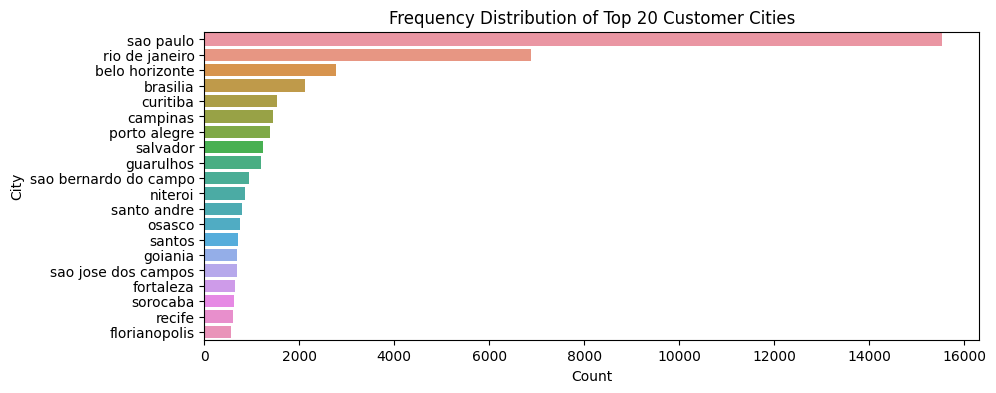

In [22]:
# Get the top 10 cities by count
top_cities = customers_df['customer_city'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 10 cities
top_cities_df = customers_df[customers_df['customer_city'].isin(top_cities)]

# Plot frequency distribution of the top 10 customer cities
plt.figure(figsize=(10, 4))
sns.countplot(y='customer_city', data=top_cities_df, order=top_cities)
plt.title('Frequency Distribution of Top 20 Customer Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

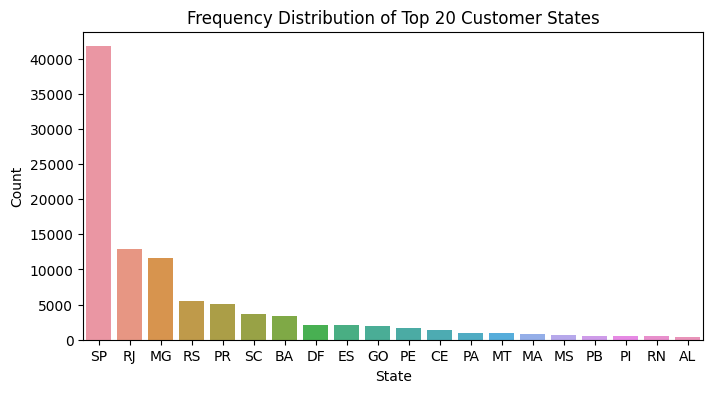

In [21]:
# Get the top 10 states by count
top_states = customers_df['customer_state'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 10 states
top_states_df = customers_df[customers_df['customer_state'].isin(top_states)]

# Plot frequency distribution of the top 10 customer states
plt.figure(figsize=(8, 4))
sns.countplot(x='customer_state', data=top_states_df, order=top_states)
plt.title('Frequency Distribution of Top 20 Customer States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [25]:
#missing values
missing_values = customers_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [26]:
#duplicate rows
duplicates = customers_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [33]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in customer_zip_code_prefix
zip_code_outliers = detect_outliers(customers_df, 'customer_zip_code_prefix')
print("Outliers in customer_zip_code_prefix:\n", zip_code_outliers)


Outliers in customer_zip_code_prefix:
 Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


## 2 Order items dataset

In [2]:
order_items_df = pd.read_csv('order_items_dataset.csv')

In [3]:
# Descriptive statistics
print("\nOrder Items Dataset Descriptive Statistics:")
print(order_items_df.describe(include='all'))


Order Items Dataset Descriptive Statistics:
       order_id;order_item_id;product_id;seller_id;shipping_limit_date;price;freight_value
count                                              112650                                 
unique                                             112650                                 
top     00010242fe8c5a6d1ba2dd792cb16214;1;4244733e06e...                                 
freq                                                    1                                 


order_item_id: Mean of 1.20, indicating that, on average, each order has around 1.20 items.

price: Mean price of 120.65, with a minimum price of 0.85 and a maximum of 6735.00.

freight_value: Mean freight value of 19.99, with a minimum of 0.00 and a maximum of 409.68.

In [39]:
# missing values
missing_values_order_items = order_items_df.isnull().sum()
print("\nOrder Items Missing values:\n", missing_values_order_items)


Order Items Missing values:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [40]:
#duplicate rows
duplicates_order_items = order_items_df.duplicated().sum()
print("\nNumber of duplicate rows in Order Items:", duplicates_order_items)


Number of duplicate rows in Order Items: 0


In [41]:
# Detect outliers in numerical columns
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

price_outliers = detect_outliers(order_items_df, 'price')
freight_value_outliers = detect_outliers(order_items_df, 'freight_value')

print("\nOutliers in price:\n", price_outliers)
print("\nOutliers in freight_value:\n", freight_value_outliers)


Outliers in price:
                                 order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
16      3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
26      c389f712c4b4510bc997cee93e8b

Outliers were detected in both price and freight_value columns.

For example, in the price column, the highest outlier was an order with a price of 6735.00, while in the freight_value column, the highest outlier was an order with a freight value of 409.68.

Outliers in the price column could represent special or high-value orders it could also be pricing errors in the dataset 

Outliers in the freight_value column could indicate anomalies in shipping costs, such as expedited shipping, oversized items, (less likely to be international shipping since all custumors are from brazil)

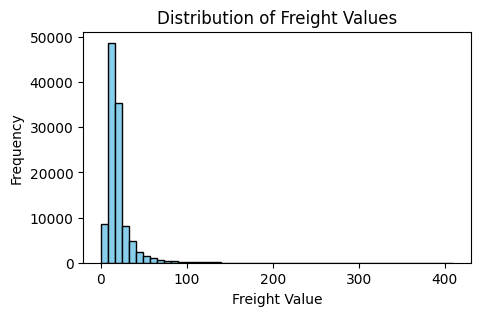

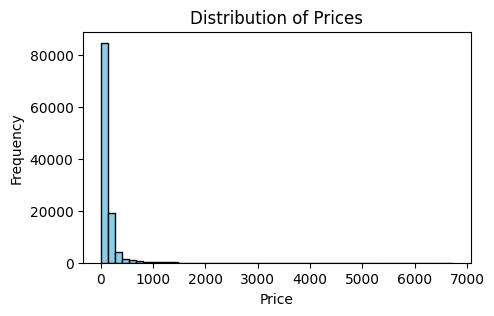

In [65]:
prices = order_items_df['price']
freight_values = order_items_df['freight_value']

# Distribution plot of freight values
plt.figure(figsize=(5, 3))
plt.hist(freight_values, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.title('Distribution of Freight Values')
plt.show()

# Assuming 'prices' is a list or pandas Series containing the prices
plt.figure(figsize=(5, 3))
plt.hist(prices, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

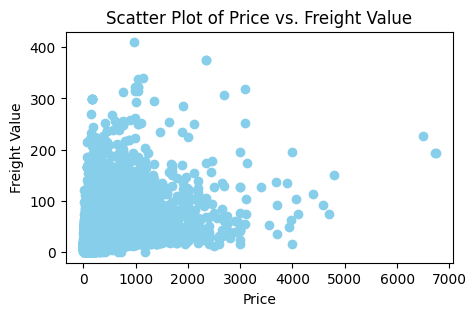

In [64]:
# Scatter plot of price vs. freight_value
plt.figure(figsize=(5, 3))
plt.scatter(prices, freight_values, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.title('Scatter Plot of Price vs. Freight Value')
plt.show()

## 3 orders dataset

In [4]:
orders_df = pd.read_csv('orders_dataset.csv')

In [82]:
unique_states =  orders_df['order_status'].unique()
print("Unique order_status:", unique_states)

Unique order_status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [43]:
# Descriptive statistics for orders dataset
print("\nOrders Dataset Descriptive Statistics:")
print(orders_df.describe(include='all'))


Orders Dataset Descriptive Statistics:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             

order_purchase_timestamp: There are 98,875 unique purchase timestamps, indicating that some orders were placed at the same time.

order_approved_at: There are 90,733 unique approval timestamps, indicating that some orders were approved at the same time.
order_delivered_carrier_date: There are 81,018 unique carrier delivery timestamps, indicating that some orders were handed over to the carrier for delivery at the same time.

order_delivered_customer_date: There are 95,664 unique customer delivery timestamps, indicating that some orders were delivered to the customer at the same time.

order_estimated_delivery_date: There are 459 unique estimated delivery dates, indicating that some orders had the same estimated delivery date.

In [45]:
#missing values
missing_values_orders = orders_df.isnull().sum()
print("\nOrders Missing values:\n", missing_values_orders)


Orders Missing values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [46]:
# duplicate rows
duplicates_orders = orders_df.duplicated().sum()
print("\nNumber of duplicate rows in Orders:", duplicates_orders)


Number of duplicate rows in Orders: 0


In [47]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in date_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# Check for inconsistencies in date columns (like having a delivery date before purchase date)
inconsistent_dates = orders_df[orders_df['order_delivered_customer_date'] < orders_df['order_purchase_timestamp']]
print("\nInconsistent delivery dates:\n", inconsistent_dates)


Inconsistent delivery dates:
 Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


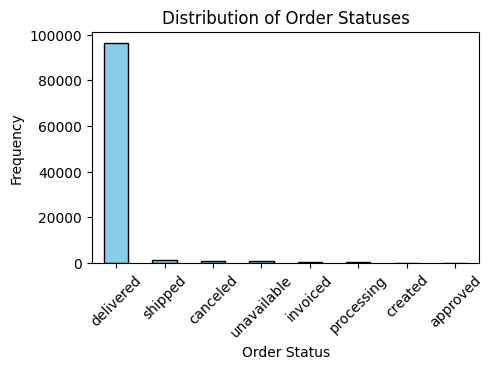

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Bar chart of order statuses
order_status_counts = orders_df['order_status'].value_counts()

plt.figure(figsize=(5, 3))
order_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Order Status')
plt.ylabel('Frequency')
plt.title('Distribution of Order Statuses')
plt.xticks(rotation=45)
plt.show()

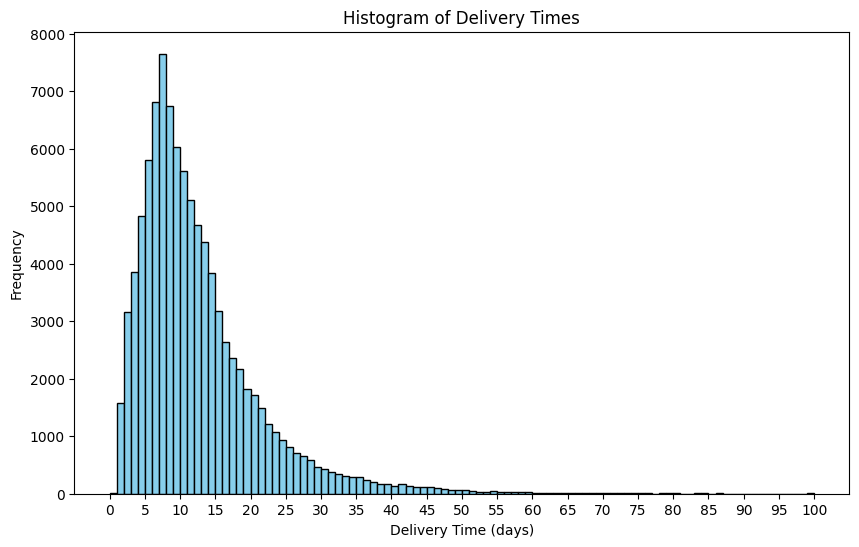

In [75]:
# Calculate delivery times
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Drop rows with NaN values in delivery_time
orders_df = orders_df.dropna(subset=['delivery_time'])

# Histogram of delivery times
plt.figure(figsize=(10, 6))
plt.hist(orders_df['delivery_time'], bins=range(0, 101), color='skyblue', edgecolor='black')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Delivery Times')
plt.xticks(range(0, 101, 5))
plt.show()


## 4 products_dataset

In [5]:
products_df = pd.read_csv('products_dataset.csv')

In [102]:
# Descriptive statistics
print("Products Dataset Descriptive Statistics:")
print(products_df.describe(include='all'))

Products Dataset Descriptive Statistics:
                              product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique  

In [52]:
# missing values
missing_values_products = products_df.isnull().sum()
print("\nProducts Missing values:\n", missing_values_products)


Products Missing values:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [53]:
# duplicate rows
duplicates_products = products_df.duplicated().sum()
print("\nNumber of duplicate rows in Products:", duplicates_products)


Number of duplicate rows in Products: 0


In [54]:
# Detect outliers in numerical columns
product_weight_outliers = detect_outliers(products_df, 'product_weight_g')
product_length_outliers = detect_outliers(products_df, 'product_length_cm')
product_height_outliers = detect_outliers(products_df, 'product_height_cm')
product_width_outliers = detect_outliers(products_df, 'product_width_cm')

print("\nOutliers in product_weight_g:\n", product_weight_outliers)
print("\nOutliers in product_length_cm:\n", product_length_outliers)
print("\nOutliers in product_height_cm:\n", product_height_outliers)
print("\nOutliers in product_width_cm:\n", product_width_outliers)


Outliers in product_weight_g:
                              product_id              product_category_name  \
6      732bd381ad09e530fe0a5f457d81becb                         cool_stuff   
11     03b63c5fc16691530586ae020c345514                              bebes   
33     1eba879220bd0981a0e2fbab499ed4e1                  moveis_escritorio   
35     5370b82a213393979691c98074265584                              bebes   
36     b8dac5113b06a97e64943234522572b9                         automotivo   
...                                 ...                                ...   
32896  180fbb426ea5ab0708d43ad3f3839bb9                        moveis_sala   
32929  01cb96c64e8e35f29826a58963f6ecc5  construcao_ferramentas_iluminacao   
32941  6ec96c91757fad0aecafc0ee7f262dcc                              bebes   
32943  3becff10d1deb92b02f2a1ee62a04524             informatica_acessorios   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   

       product_name_lenght  pro

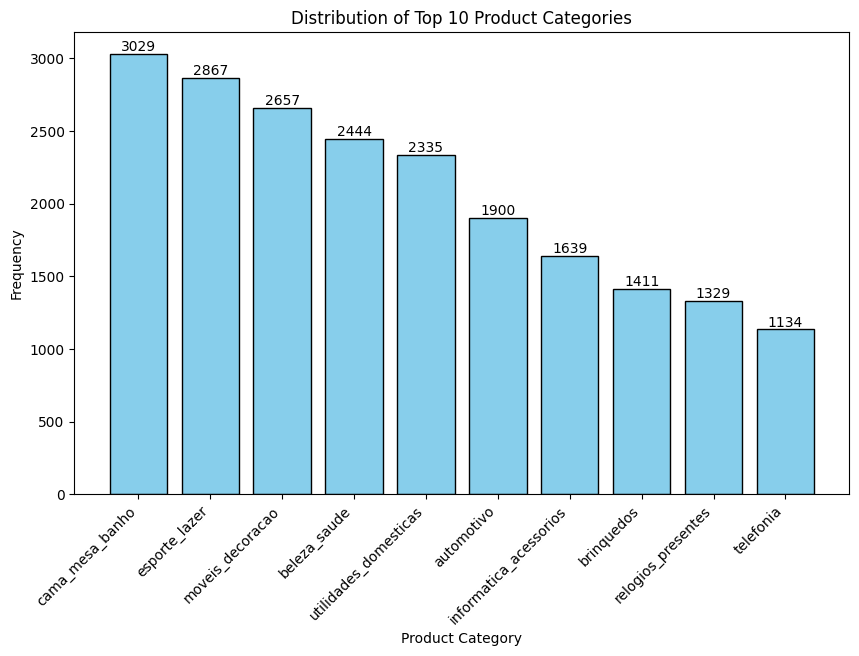

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

top_10_categories = products_df['product_category_name'].value_counts().nlargest(10)

# Bar chart of the top 10 product categories
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_categories.index, top_10_categories.values, color='skyblue', edgecolor='black')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Distribution of Top 10 Product Categories')
plt.xticks(rotation=45, ha='right')

# Adding the product category names inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [6]:
import pandas as pd

# Read the CSV files into DataFrames
df_order_items = pd.read_csv('order_items_dataset.csv', sep=';')
df_orders = pd.read_csv('orders_dataset.csv')

# Calculate the number of orders for each product_id
orders_per_product = df_order_items['product_id'].value_counts().reset_index()
orders_per_product.columns = ['product_id', 'number_ofOrders']

# Calculate the price per piece for each product_id
price_per_piece = df_order_items.groupby('product_id')['price'].mean().reset_index()
price_per_piece.columns = ['product_id', 'price_per_piece']

# Merge the number of orders and price per piece into a single DataFrame
result_df = pd.merge(orders_per_product, price_per_piece, on='product_id')

# Read the products_dataset
products_dataset = pd.read_csv('products_dataset.csv')

# Merge the product_category_name from products_dataset into the result_df
result_df = pd.merge(result_df, products_dataset[['product_id', 'product_category_name']], on='product_id')

# Merge the order_purchase_timestamp from orders_dataset into the result_df
result_df = pd.merge(result_df, df_orders[['order_id', 'order_purchase_timestamp']], left_on='product_id', right_on='order_id')

# Drop the redundant order_id column
result_df.drop('order_id', axis=1, inplace=True)

# Convert order_purchase_timestamp to month-year format
result_df['order_purchase_timestamp'] = pd.to_datetime(result_df['order_purchase_timestamp']).dt.to_period('M')

# Display the result
print(result_df)

Empty DataFrame
Columns: [product_id, number_ofOrders, price_per_piece, product_category_name, order_purchase_timestamp]
Index: []


In [120]:
result_df.to_excel('new.xlsx', index=False)

# correlation between product sales and their price

In [47]:
import pandas as pd

# Read the CSV file into a DataFrame with semicolon-separated values
df_order_items = pd.read_csv('order_items_dataset.csv', sep=';')

# Calculate the number of times each product_id appears
product_counts = df_order_items['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

# Calculate the average price for each product_id
product_prices = df_order_items.groupby('product_id')['price'].mean().reset_index()

# Merge the counts and prices into a single DataFrame
result_df = pd.merge(product_counts, product_prices, on='product_id')

# Display the result
print(result_df)


                             product_id  count       price
0      aca2eb7d00ea1a7b8ebd4e68314663af    527   71.364137
1      99a4788cb24856965c36a24e339b6058    488   88.167131
2      422879e10f46682990de24d770e7f83d    484   54.911612
3      389d119b48cf3043d311335e499d9c6b    392   54.695383
4      368c6c730842d78016ad823897a372db    388   54.270103
...                                 ...    ...         ...
32946  dbc42f8ad8afd0147a5a46be630781f8      1   46.900000
32947  5d86ed92606c80a89e547cdba3946812      1   25.990000
32948  0b8750fa58fefe42cf03a9e2e4b8fce6      1  215.000000
32949  a4758e74e2cdb74d0c4db83594ca14a3      1  558.500000
32950  350688d9dc1e75ff97be326363655e01      1   43.000000

[32951 rows x 3 columns]


In [20]:
# Save the category_sales
category_sales.to_excel('category_sales.xlsx', index=False)

In [31]:
# Calculate the correlation
correlation = result_df['count'].corr(result_df['price'])

# Display the correlation
print(f"Correlation between Count of Products and Price: {correlation}")

Correlation between Count of Products and Price: -0.03213986268094529


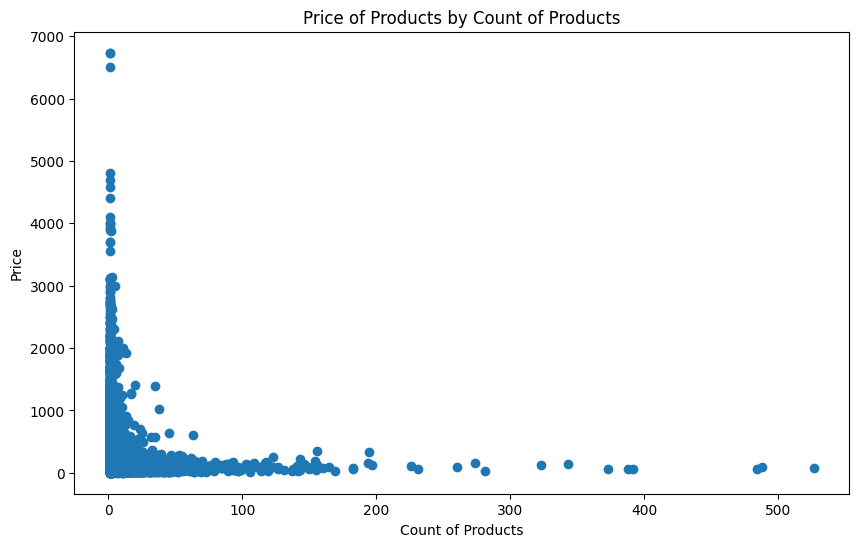

In [24]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df['count'], result_df['price'])
plt.title('Price of Products by Count of Products')
plt.xlabel('Count of Products')
plt.ylabel('Price')
plt.show()

# correlation between product category and product sales

In [61]:
import pandas as pd

df_order_items = pd.read_csv('order_items_dataset.csv', sep=';')

# Calculate the number of times each product_id appears
product_counts = df_order_items['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']
product_prices = df_order_items.groupby('product_id')['price'].mean().reset_index()

# Merge the counts and prices into a single DataFrame
result_df = pd.merge(product_counts, product_prices, on='product_id')

# Add the product_category_name column from df_products
df_products = pd.read_csv('products_dataset.csv')
result_df = pd.merge(result_df, df_products[['product_id', 'product_category_name']], on='product_id')

# Group by product_category_name and sum the counts
category_counts = result_df.groupby('product_category_name')['count'].sum().reset_index()
print(category_counts)

        product_category_name  count
0   agro_industria_e_comercio    212
1                   alimentos    510
2           alimentos_bebidas    278
3                       artes    209
4          artes_e_artesanato     24
..                        ...    ...
68    sinalizacao_e_seguranca    199
69   tablets_impressao_imagem     83
70                  telefonia   4545
71             telefonia_fixa    264
72      utilidades_domesticas   6964

[73 rows x 2 columns]


In [62]:
# Calculate correlation
result_df = pd.get_dummies(result_df, columns=['product_category_name'])
correlation = result_df.corr()['count'].drop('count')
print(correlation)

price                                             -0.032140
product_category_name_agro_industria_e_comercio   -0.002474
product_category_name_alimentos                    0.013173
product_category_name_alimentos_bebidas           -0.003951
product_category_name_artes                        0.001468
                                                     ...   
product_category_name_sinalizacao_e_seguranca     -0.006407
product_category_name_tablets_impressao_imagem     0.009033
product_category_name_telefonia                    0.010475
product_category_name_telefonia_fixa              -0.006397
product_category_name_utilidades_domesticas       -0.011345
Name: count, Length: 74, dtype: float64


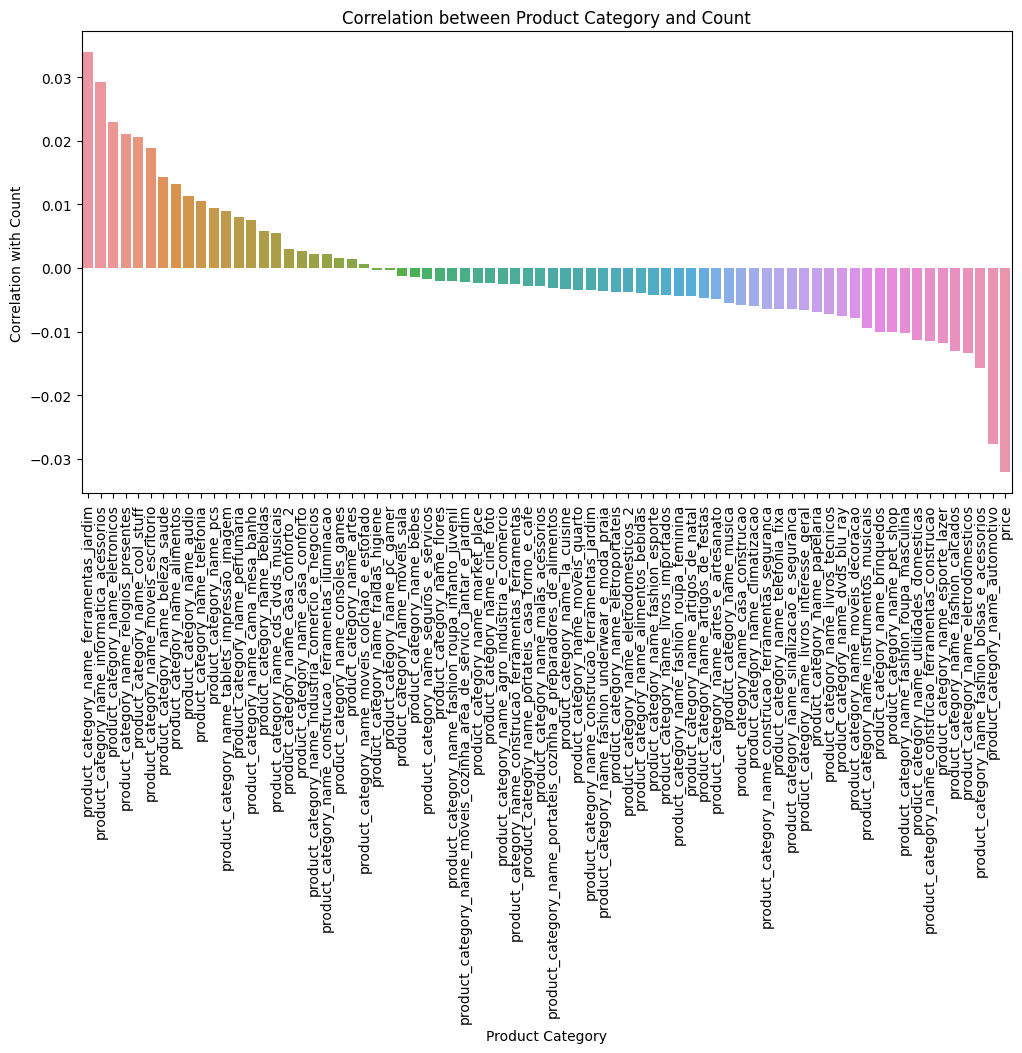

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = result_df.corr()['count'].drop('count')
correlation_sorted = correlation.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Correlation with Count')
plt.title('Correlation between Product Category and Count')
plt.show()


### merging tables

In [16]:
import pandas as pd

# Read the CSV files into DataFrames with semicolon-separated values
df_order_items = pd.read_csv('order_items_dataset.csv', sep=';')
df_orders = pd.read_csv('orders_dataset.csv', sep=';')

# Split the columns in df_orders
df_orders = df_orders.rename(columns=lambda x: x.split(',')[0].replace('"', '').strip())
df_orders.columns = [col.replace('"', '').strip() for col in df_orders.columns]

# Check the column names of both DataFrames
print("Order Items Dataset Columns:", df_order_items.columns)
print("Orders Dataset Columns:", df_orders.columns)

# Select only the required columns from the datasets
df_order_items_selected = df_order_items[['order_id', 'product_id']]
df_orders_selected = df_orders[['order_id', 'order_purchase_timestamp']]

# Merge the DataFrames on 'order_id'
merged_df = pd.merge(df_order_items_selected, df_orders_selected, on='order_id', how='left')

# Convert order_purchase_timestamp to month-year format
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')
merged_df['order_purchase_timestamp'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Display the first 5 rows of the result
print(merged_df.head())

Order Items Dataset Columns: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Orders Dataset Columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
                           order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   

  order_purchase_timestamp  
0                  2017-09  
1                  2017-04  
2                  2018-01  
3               

In [18]:
import pandas as pd

# Read the CSV files into DataFrames
df_order_items = pd.read_csv('order_items_dataset.csv', sep=';')
df_orders = pd.read_csv('orders_dataset.csv', sep=';', quotechar='"')
df_products = pd.read_csv('products_dataset.csv', sep=',')

# Check the column names of all DataFrames
print("Order Items Dataset Columns:", df_order_items.columns)
print("Orders Dataset Columns:", df_orders.columns)
print("Products Dataset Columns:", df_products.columns)

# Select only the required columns from the datasets
df_order_items_selected = df_order_items[['order_id', 'product_id']]
df_orders_selected = df_orders[['order_id', 'order_purchase_timestamp']]

# Merge the DataFrames on 'order_id'
merged_df = pd.merge(df_order_items_selected, df_orders_selected, on='order_id', how='left')

# Convert order_purchase_timestamp to month-year format
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')
merged_df['order_purchase_timestamp'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Select only the required columns from the products dataset
df_products_selected = df_products[['product_id', 'product_category_name']]

# Merge the product category information into the merged DataFrame
final_df = pd.merge(merged_df, df_products_selected, on='product_id', how='left')

# Display the first 5 rows of the result
print(final_df.head())

Order Items Dataset Columns: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Orders Dataset Columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Products Dataset Columns: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
                           order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcd